Why EDA ? ( IT is an iterative process)
- Model Building 
- Analysis Building 
- Validate assumption
- Handling missing values
- feature engineering
- detecting outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eda humhara train wale pe ho jata 


In [2]:
df = pd.read_csv("train.csv")


In [3]:
df.head()
#SibSp = Siblings/Spouses aboard the Titanic
#Parch = Parents/Children aboard the Titanic
#Cabin = Cabin number
#Embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Steps of EDA
***STEP 1 :- Label Column Types***

For example
- Numerical- Age,fare,passengerid
- Categorial- Survived,Pclass,Sex,SibSp,Parch,Embarked
- Mixed - Name,Ticket,Cabin

***Step 2 :- Perform Univariate Analysis on the dataset i.e analysis of single column only***

***Step3 :- Perform Bivariate analysis on the dataset i.e analysis over two colummns***

***Step 4:- Perform Multivariate analysis on the dataset i.e analysis over more than 2 columns***

***Step 5 :- Feature Engineering***

### Deep Dive Into Step 2 :- Univariate Analysis

It focuses on analyzing individual columns in dataset independently.

- Distribution analysis: The distribution of each feature is examined to identify its shape(overall pattern or form as it represented on graph such as Normal,Skewed,Bimodal,Unifrom), central tendency(Mean,Median, Mode) and dispersion(How data is spread measured using range,Variance , Standard Deviation).

- Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

Steps of doing Univariate Analysis on Numerical columns
- Descriptive Statistics: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers 

- Visualizations: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- Identifying Outliers: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- Skewness: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [4]:
# Descriptive statistics On AGE column
df['Age'].describe()
# 25% denotes Quartile 1 which means 25% of people have less age than 20
# 50% denotes Median which means 50% of people have less age than 28
# 75% denotes Quartile 3 which means 75% of people have less age than 38

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

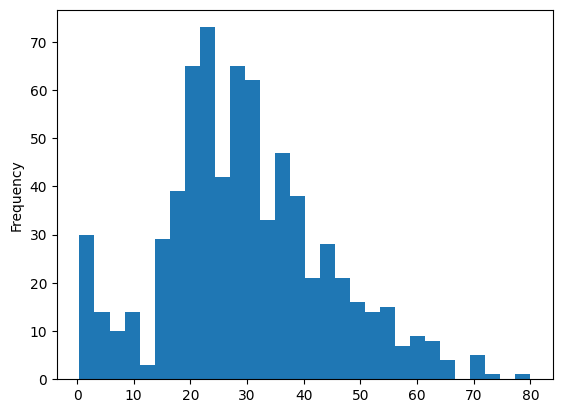

In [5]:
df['Age'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

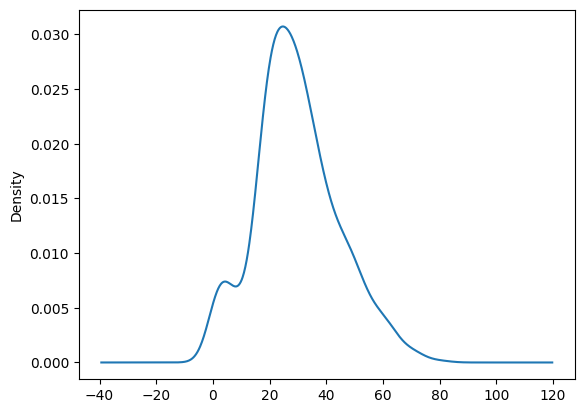

In [6]:
df['Age'].plot(kind='kde')

In [7]:
df['Age'].skew() 
# If skewness >0 then it is positively skewed
# If skewness <0 then it is negatively skewed
# If skewness =0 then it is normal distribution our is normal distribution -- Good Thing

np.float64(0.38910778230082704)

<Axes: >

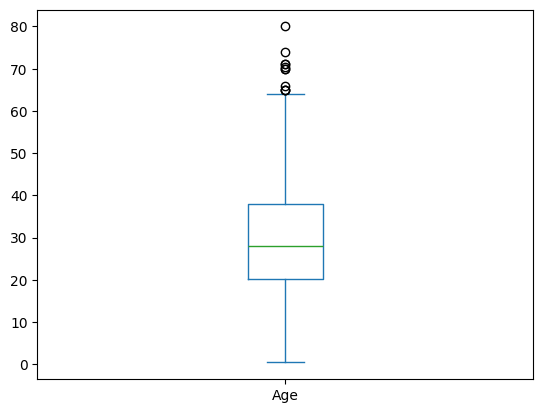

In [8]:
df['Age'].plot(kind='box')
# 65 -> Outlier

In [9]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'].isnull().sum() # Total Missing Values in Age Column

np.int64(177)

In [ ]:
df['Age'].isnull().sum()/len(df['Age']) * 100 # Percentage of Missing Values in Age Column

np.float64(19.865319865319865)

Conclusion -> 
- Age is normally distributed 
- 20% of people age are missing
- There are some outliers also

<Axes: ylabel='Frequency'>

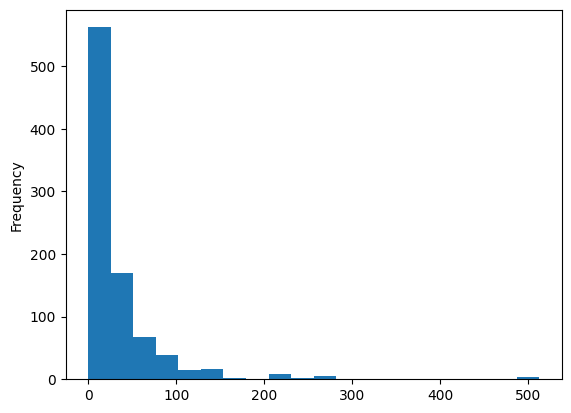

In [17]:
df['Fare'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

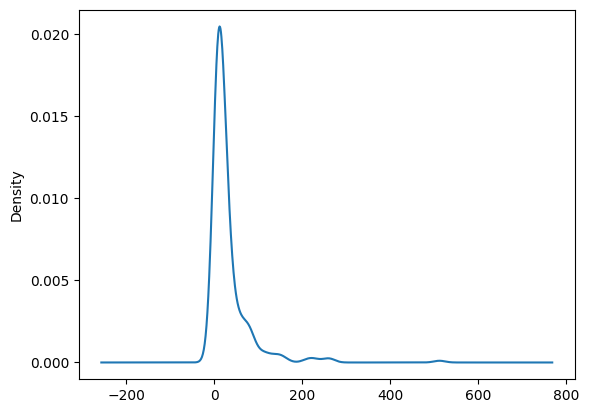

In [19]:
df['Fare'].plot(kind='kde')

In [20]:
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: >

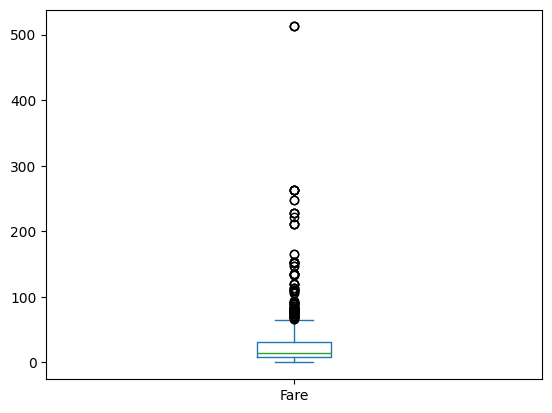

In [21]:
df['Fare'].plot(kind='box')